In [1]:
import json
import pprint
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
import glob

p = "train_meta.json"
with open(p, 'r') as j:
    data = json.loads(j.read())
    pprint.pprint(data)

{'000': {'category': 'クレセント', 'color': 'YW'},
 '001': {'category': 'クレセント', 'color': 'A3'},
 '002': {'category': 'クレセント', 'color': 'DG'},
 '003': {'category': 'クレセント', 'color': 'YS'},
 '004': {'category': '戸車', 'color': 'YS'},
 '005': {'category': '戸車', 'color': 'YS'},
 '006': {'category': '戸車', 'color': 'YS'},
 '007': {'category': 'クレセント', 'color': 'YS'},
 '008': {'category': 'クレセント', 'color': 'DG'},
 '009': {'category': 'クレセント', 'color': 'YS'},
 '010': {'category': '戸車', 'color': 'YS'},
 '011': {'category': 'クレセント', 'color': 'YW'},
 '012': {'category': '戸車', 'color': 'YS'},
 '013': {'category': '戸車', 'color': 'YS'},
 '014': {'category': 'クレセント', 'color': 'CC'},
 '015': {'category': 'クレセント', 'color': 'YW'},
 '016': {'category': '戸車', 'color': 'YS'},
 '017': {'category': '戸車', 'color': 'YS'},
 '018': {'category': 'クレセント', 'color': 'DG'},
 '019': {'category': 'クレセント', 'color': 'A3'},
 '020': {'category': '戸車', 'color': 'YS'},
 '021': {'category': '戸車', 'color': 'YB'},
 '022': {'category

In [12]:
color_list = []
for i in range(121+1):
    if i < 10:
        i = "00"+str(i)
    elif i<100 and i>9:
        i = "0"+str(i)
    elif i>99:
        i = str(i)
    if data[i]["color"] in color_list:
        pass
    else:
        color_list.append(data[i]["color"])
color_list

['YW', 'A3', 'DG', 'YS', 'CC', 'YB', 'CH', 'YK', 'WM', 'E5', 'RB']

In [13]:
df=[]
for i in range(121+1):
    if i < 10:
        i = "00"+str(i)
    elif i<100 and i>9:
        i = "0"+str(i)
    elif i>99:
        i = str(i)
    shape = 0 if data[i]["category"]=="戸車" else 1
    cidx = color_list.index(str(data[i]["color"]))  
    df.append(shape+cidx)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff21eccb550>]],
      dtype=object)

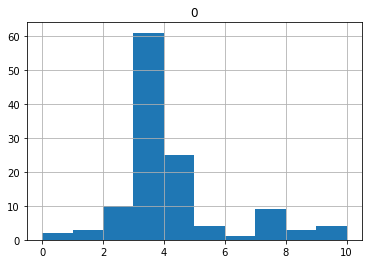

In [16]:
import pandas as pd
df_ = pd.DataFrame(df)
df_.hist()

In [6]:
def loadImage(img_file):
    img = cv2.imread(img_file)           # RGB order
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def save_metaimg(n=224):
    metaimg= []
    for i in range(121+1):
        if i < 10:
            i = "00"+str(i)
        elif i<100 and i>9:
            i = "0"+str(i)
        elif i>99:
            i = str(i)
        if data[i]["category"]=="戸車":
            img = loadImage("colors/togur.jpeg")
        elif data[i]["category"]=="クレセント":
            img = loadImage("colors/clecent.png")
        img = cv2.resize(img, (n, n), interpolation=cv2.INTER_LINEAR)
        img = img.astype(np.float32)/255
        print(i, img.max(), img.min(), data[i]["category"], data[i]["color"])
        np.save("meta/type/"+i, img)
    
save_metaimg()

000 1.0 0.06666667 クレセント YW
001 1.0 0.06666667 クレセント A3
002 1.0 0.06666667 クレセント DG
003 1.0 0.06666667 クレセント YS
004 1.0 0.03137255 戸車 YS
005 1.0 0.03137255 戸車 YS
006 1.0 0.03137255 戸車 YS
007 1.0 0.06666667 クレセント YS
008 1.0 0.06666667 クレセント DG
009 1.0 0.06666667 クレセント YS
010 1.0 0.03137255 戸車 YS
011 1.0 0.06666667 クレセント YW
012 1.0 0.03137255 戸車 YS
013 1.0 0.03137255 戸車 YS
014 1.0 0.06666667 クレセント CC
015 1.0 0.06666667 クレセント YW
016 1.0 0.03137255 戸車 YS
017 1.0 0.03137255 戸車 YS
018 1.0 0.06666667 クレセント DG
019 1.0 0.06666667 クレセント A3
020 1.0 0.03137255 戸車 YS
021 1.0 0.03137255 戸車 YB
022 1.0 0.06666667 クレセント YS
023 1.0 0.06666667 クレセント A3
024 1.0 0.03137255 戸車 YS
025 1.0 0.03137255 戸車 YS
026 1.0 0.03137255 戸車 YS
027 1.0 0.03137255 戸車 YS
028 1.0 0.03137255 戸車 DG
029 1.0 0.03137255 戸車 YB
030 1.0 0.06666667 クレセント YS
031 1.0 0.06666667 クレセント YS
032 1.0 0.03137255 戸車 YS
033 1.0 0.06666667 クレセント YS
034 1.0 0.06666667 クレセント CH
035 1.0 0.06666667 クレセント YS
036 1.0 0.03137255 戸車 YW
037 1.0 0.03137255

(301, 168, 3) 255 0


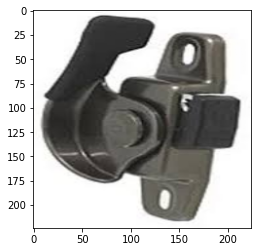

(<matplotlib.image.AxesImage at 0x7fb4cb5180f0>, None)

In [13]:
n = 224
img = loadImage("meta/togur.jpeg")
print(img.shape, img.max(), img.min())
img = cv2.resize(img, (n, n), interpolation=cv2.INTER_LINEAR)
plt.imshow(img.astype(np.float32)/255, "gray"),plt.show()

In [4]:
def rgbplot(p, name=None):
    from skimage import io
    import matplotlib.pyplot as plt
    #image = io.imread(p)
    image = p
    plt.figure(figsize=[20,20])
    _ = plt.hist(image.ravel(), bins = 256, color = 'orange', )
    _ = plt.hist(image[:, :, 0].ravel(), bins = 256, color = 'red', alpha = 0.5)
    _ = plt.hist(image[:, :, 1].ravel(), bins = 256, color = 'Green', alpha = 0.5)
    _ = plt.hist(image[:, :, 2].ravel(), bins = 256, color = 'Blue', alpha = 0.5)
    #_ = plt.xlabel('Intensity Value')
    #_ = plt.ylabel('Count')
    #_ = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])
    if name:
        plt.savefig(name)
    plt.show()
# https://towardsdatascience.com/histograms-in-image-processing-with-skimage-python-be5938962935

def color_save(name, r = 160):
    ys = loadImage(os.path.join("colors", name))
    print(ys.shape, ys[r:-r, r:-r].shape)
    rim = cv2.resize(ys[r:-r, r:-r], (224, 224))
    print(rim.max(), rim.min())
    #plt.imshow(ys),plt.show()
    #plt.imshow(rim.astype(np.float32)/255),plt.show()
    return rim.astype(np.float32)/255

def rgb_test(num:str, name:str):
    ss = glob.glob("train/{}/*.jpg".format(num))
    ss = [cv2.resize(cv2.imread(im), (1000, 1000)) for im in ss]
    rgbplot(np.vstack(ss), 'colors/{}.png'.format(name))
    
#rgb_save("103", name="RB")
colorlist = ["RB", "E5", 'WM', "YK", "CH", "YB", "CC",
             "YS", "DG", "A3", "YW"]
rgbbox=[]
for i in range(121+1):
    if i < 10:
        i = "00"+str(i)
    elif i<100 and i>9:
        i = "0"+str(i)
    elif i>99:
        i = str(i)
    if data["002"]["color"] in colorlist:
        name = str(data[i]["color"])+".png"
        print(i)
        rimg = color_save(name, r = 160)
        np.save("meta/color/"+i, rimg)
        #rgbbox.append(rimg)
#print(len(rgbbox))


000
(1440, 1440, 3) (1120, 1120, 3)
255 0
001
(1440, 1440, 3) (1120, 1120, 3)
255 0
002
(1440, 1440, 3) (1120, 1120, 3)
255 0
003
(1440, 1440, 3) (1120, 1120, 3)
255 0
004
(1440, 1440, 3) (1120, 1120, 3)
255 0
005
(1440, 1440, 3) (1120, 1120, 3)
255 0
006
(1440, 1440, 3) (1120, 1120, 3)
255 0
007
(1440, 1440, 3) (1120, 1120, 3)
255 0
008
(1440, 1440, 3) (1120, 1120, 3)
255 0
009
(1440, 1440, 3) (1120, 1120, 3)
255 0
010
(1440, 1440, 3) (1120, 1120, 3)
255 0
011
(1440, 1440, 3) (1120, 1120, 3)
255 0
012
(1440, 1440, 3) (1120, 1120, 3)
255 0
013
(1440, 1440, 3) (1120, 1120, 3)
255 0
014
(1440, 1440, 3) (1120, 1120, 3)
255 0
015
(1440, 1440, 3) (1120, 1120, 3)
255 0
016
(1440, 1440, 3) (1120, 1120, 3)
255 0
017
(1440, 1440, 3) (1120, 1120, 3)
255 0
018
(1440, 1440, 3) (1120, 1120, 3)
255 0
019
(1440, 1440, 3) (1120, 1120, 3)
255 0
020
(1440, 1440, 3) (1120, 1120, 3)
255 0
021
(1440, 1440, 3) (1120, 1120, 3)
255 0
022
(1440, 1440, 3) (1120, 1120, 3)
255 0
023
(1440, 1440, 3) (1120, 1120, 3